# Times series Forecastig

Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de las ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

In [2]:
data.head() 

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
data.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [4]:
print(data.iloc[0])

sales    55.292157
Name: 2022-09-03 17:10:08.079328, dtype: float64


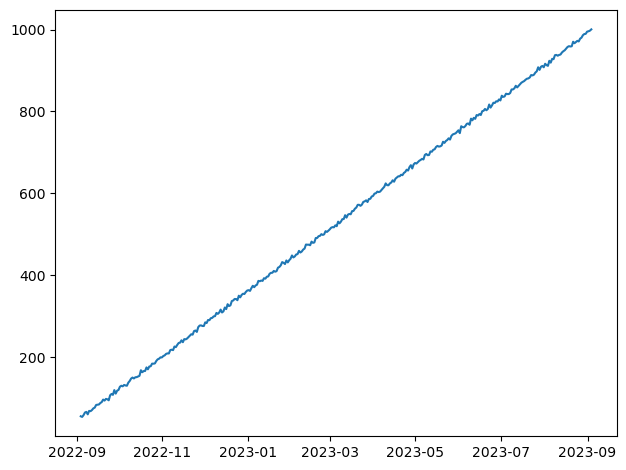

In [5]:
import matplotlib.pyplot as plt

plt.plot(data.index ,data["sales"])
plt.tight_layout()
plt.show()

# ¿Cuál es el tensor de la serie temporal?

In [6]:
data.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


El tensor es diario

# Transformamos la variable date

In [7]:
data["fecha"] = pd.to_datetime(data.index)
data["year"] = data["fecha"].dt.year
data["month"] = data["fecha"].dt.month
data["day"]= data["fecha"].dt.day
data.head()


,sales,fecha,year,month,day
date,,,,,
2022-09-03 17:10:08.079328,55.292157,2022-09-03 17:10:08.079328,2022,9,3
2022-09-04 17:10:08.079328,53.803211,2022-09-04 17:10:08.079328,2022,9,4
2022-09-05 17:10:08.079328,58.141693,2022-09-05 17:10:08.079328,2022,9,5
2022-09-06 17:10:08.079328,64.530899,2022-09-06 17:10:08.079328,2022,9,6
2022-09-07 17:10:08.079328,66.013633,2022-09-07 17:10:08.079328,2022,9,7


In [8]:
print("min:", data["fecha"].min(),"\nmax:",data["fecha"].max())


min: 2022-09-03 17:10:08.079328 
max: 2023-09-03 17:10:08.079328


# ¿Cuál es la tendencia?

c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


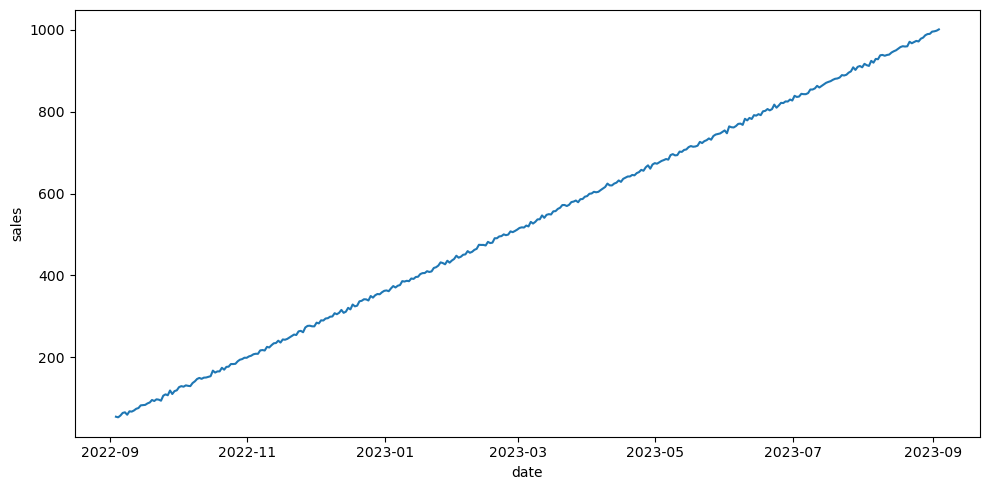

In [9]:
ts= data["sales"]

import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

Filtro mensual y anual agrupado en meses.

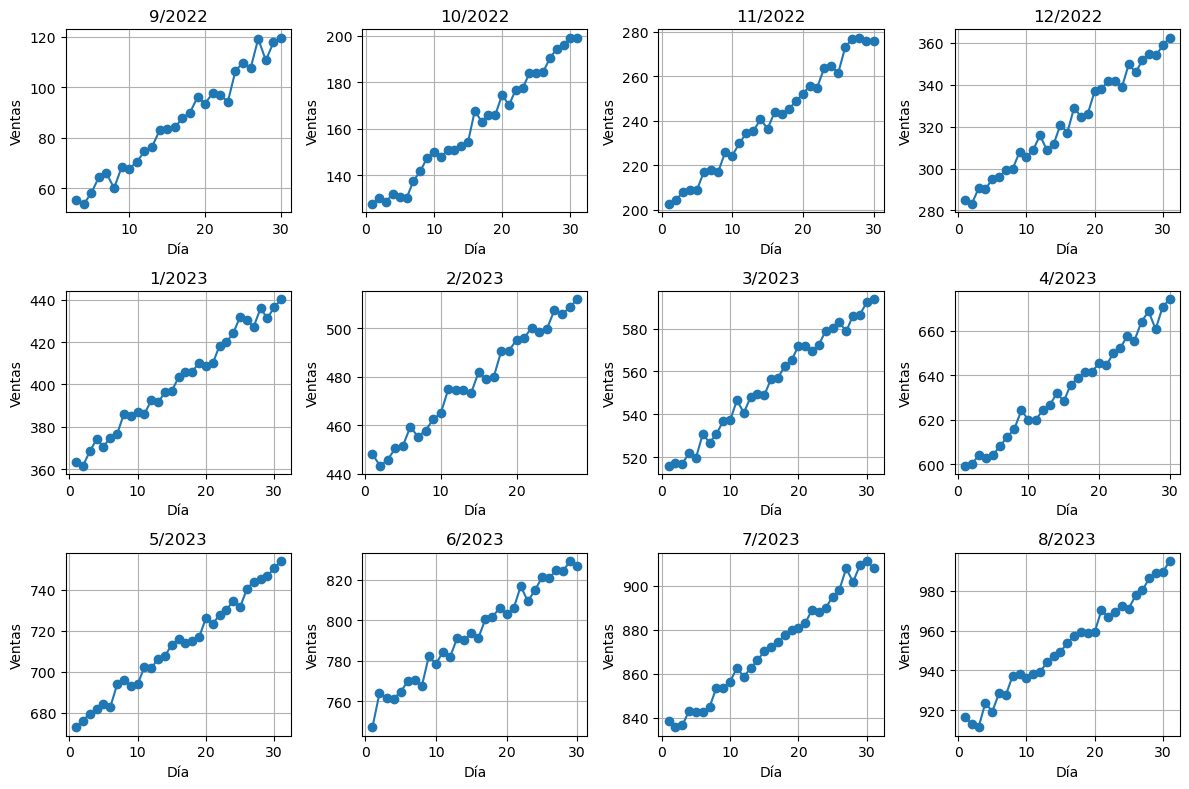

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.ravel()

months = [9,10,11,12,1,2,3,4,5,6,7,8]
years = [2022,2022,2022,2022,2023,2023,2023,2023,2023,2023,2023,2023]

for i, ax in enumerate(axes):
    x = data["day"][(data["month"] == months[i]) & (data["year"] == years[i])]
    y = data["sales"][(data["month"] == months[i]) & (data["year"] == years[i])]
    
    ax.plot(x, y, marker='o')
    ax.set_title(f"{months[i]}/{years[i]}")
    ax.set_xlabel("Día")
    ax.set_ylabel("Ventas")
    ax.grid(True)

plt.tight_layout()
plt.show()

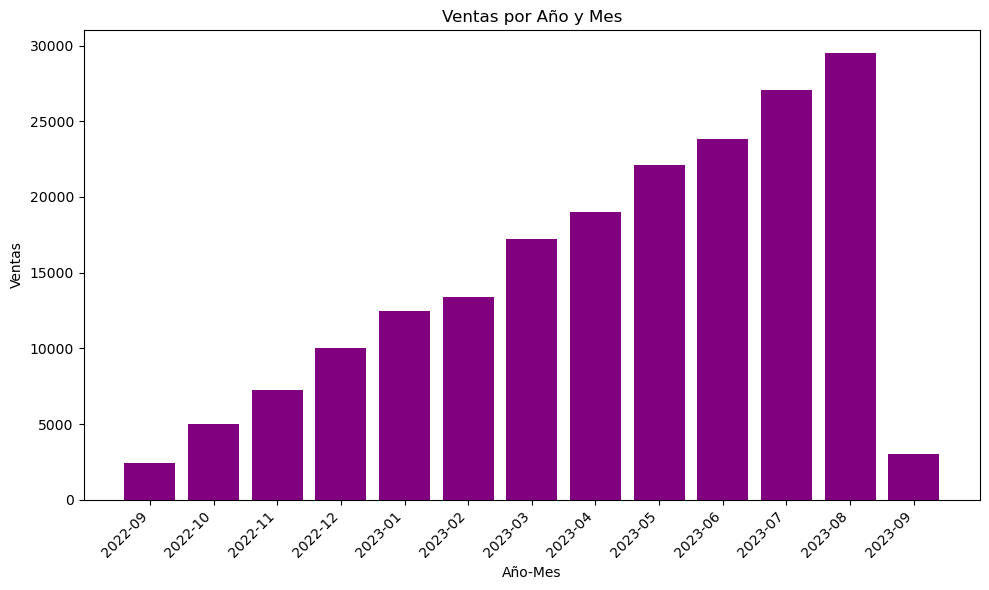

In [11]:
data_anual = data.groupby(['year', 'month'])['sales'].sum()

years_months = [f"{key[0]}-{key[1]:02d}" for key in data_anual.index]  #  Etiquetas "Año-Mes"

values = data_anual.values # Valores de ventas

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(years_months, values, color='purple')

plt.xlabel('Año-Mes')
plt.ylabel('Ventas')
plt.title('Ventas por Año y Mes')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Volvemos a confirmar que la tendencia es crecientye mes con mes

Hay una tendencia creciente desde 2022-09.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period= 12)
decomposition

c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

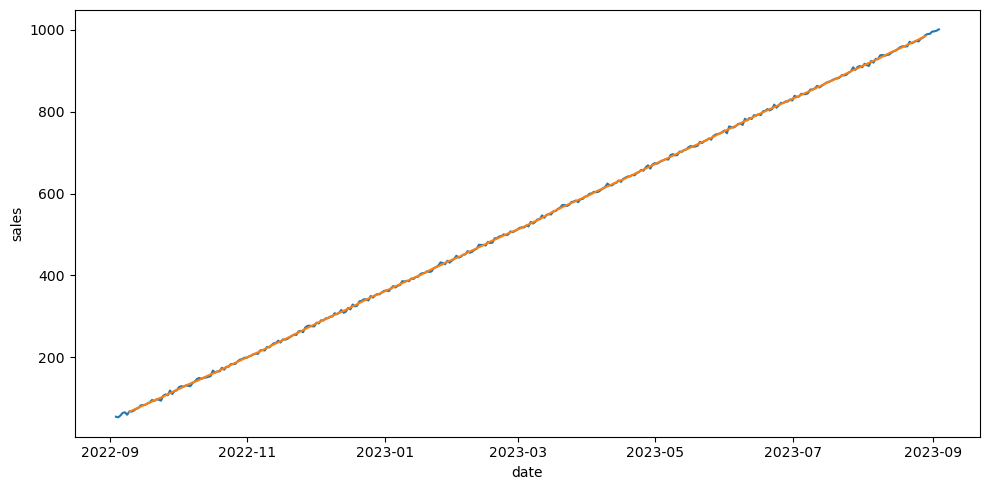

In [13]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10,5))
sns.lineplot(data = ts)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

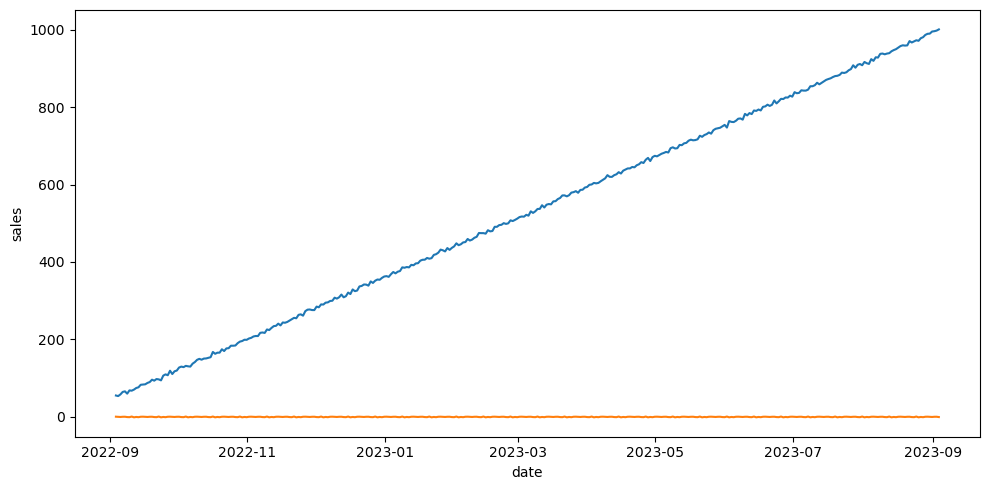

In [14]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

# ¿Es estacionaria?

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

El p-value es mucho mayor a 0.05, por lo tanto rechazamos la hipotesis nula, lo cual nos indica que la serie no es estacionaria.

# ¿Existe variabilidad o presencia de ruido?

c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

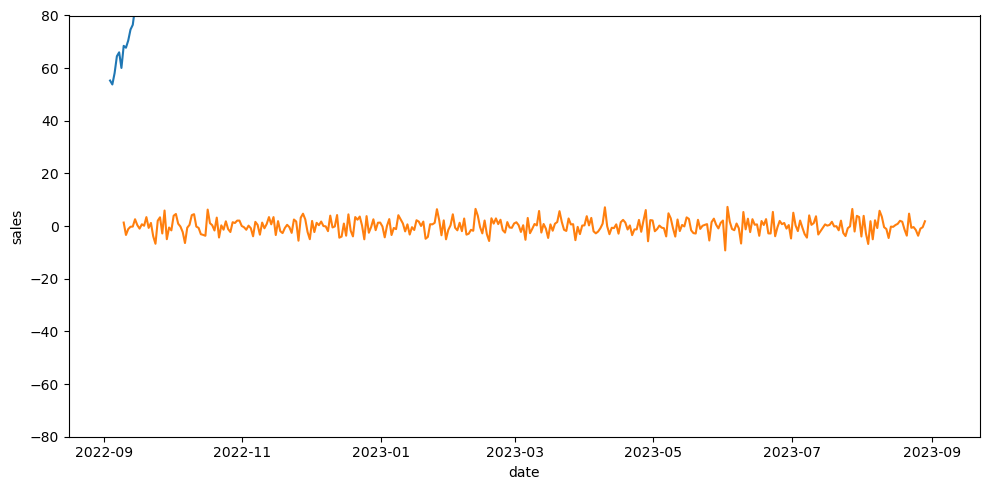

In [16]:
# Análisis de la variabilidad

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.ylim(-80,80)
plt.tight_layout()

plt.show()


No existe variablididad o presencia de ruido

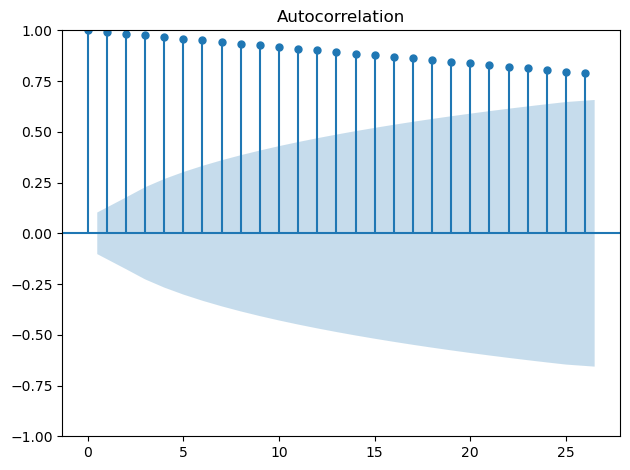

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

# Paso 3: Entrena un ARIMA

In [18]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


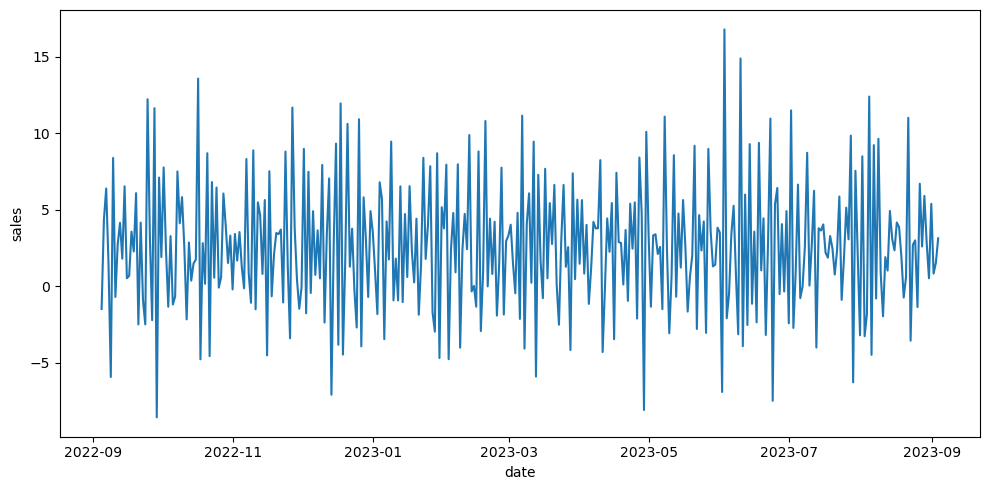

In [19]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)

plt.tight_layout()
plt.show()

Dividimos la serie para obtener los datos de entrenamiento y los de prueba:



In [20]:

data.index = pd.to_datetime(data.index)

ts = data['sales'] # serie temporal
ts_stationary = ts 
                   

split_idx = int(len(ts_stationary) * 0.8) # Dividir respetando el orden temporal (80% train, 20% test)
ts_train = ts_stationary.iloc[:split_idx]
ts_test = ts_stationary.iloc[split_idx:]

In [21]:
from pmdarima import auto_arima

model = auto_arima(ts_train, seasonal=True, m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1477.736, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1675.428, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1574.824, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1472.428, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1763.761, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1475.165, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1472.823, Time=0.42 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1471.450, Time=0.23 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=1472.465, Time=0.49 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=1470.355, Time=0.75 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=1678.420, Time=0.17 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=1472.8

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  292
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 7)   Log Likelihood                -729.177
Date:                           Wed, 21 May 2025   AIC                           1470.355
Time:                                   23:23:23   BIC                           1492.395
Sample:                               09-03-2022   HQIC                          1479.184
                                    - 06-21-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6279      0.537      6.755      0.000       2.575       4.680
ma.L1         -0.9842      0.020    -48.339      0.000      -1.024      -0.944
ar.S.L7       -0.6070      0.184     -3.301      0.001      -0.967      -0.247
ar.S.L14       0.2116      0.059      3.583      0.000       0.096       0.327
ma.S.L7        0.7658      0.190      4.039      0.000       0.394       1.137
sigma2         8.7703      0.812     10.805      0.000       7.179      10.361
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.26   Prob(JB):                         0.45
Heteroskedasticity (H):               0.91   Skew:                             0.08
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#Predicciones
forecast = model.predict(n_periods=len(ts_test))


forecast_index = ts_test.index # Crear rango de fechas para el forecast
forecast_series = pd.Series(forecast, index=forecast_index)  # Convertir forecast a Serie con índice de fechas


c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Andres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

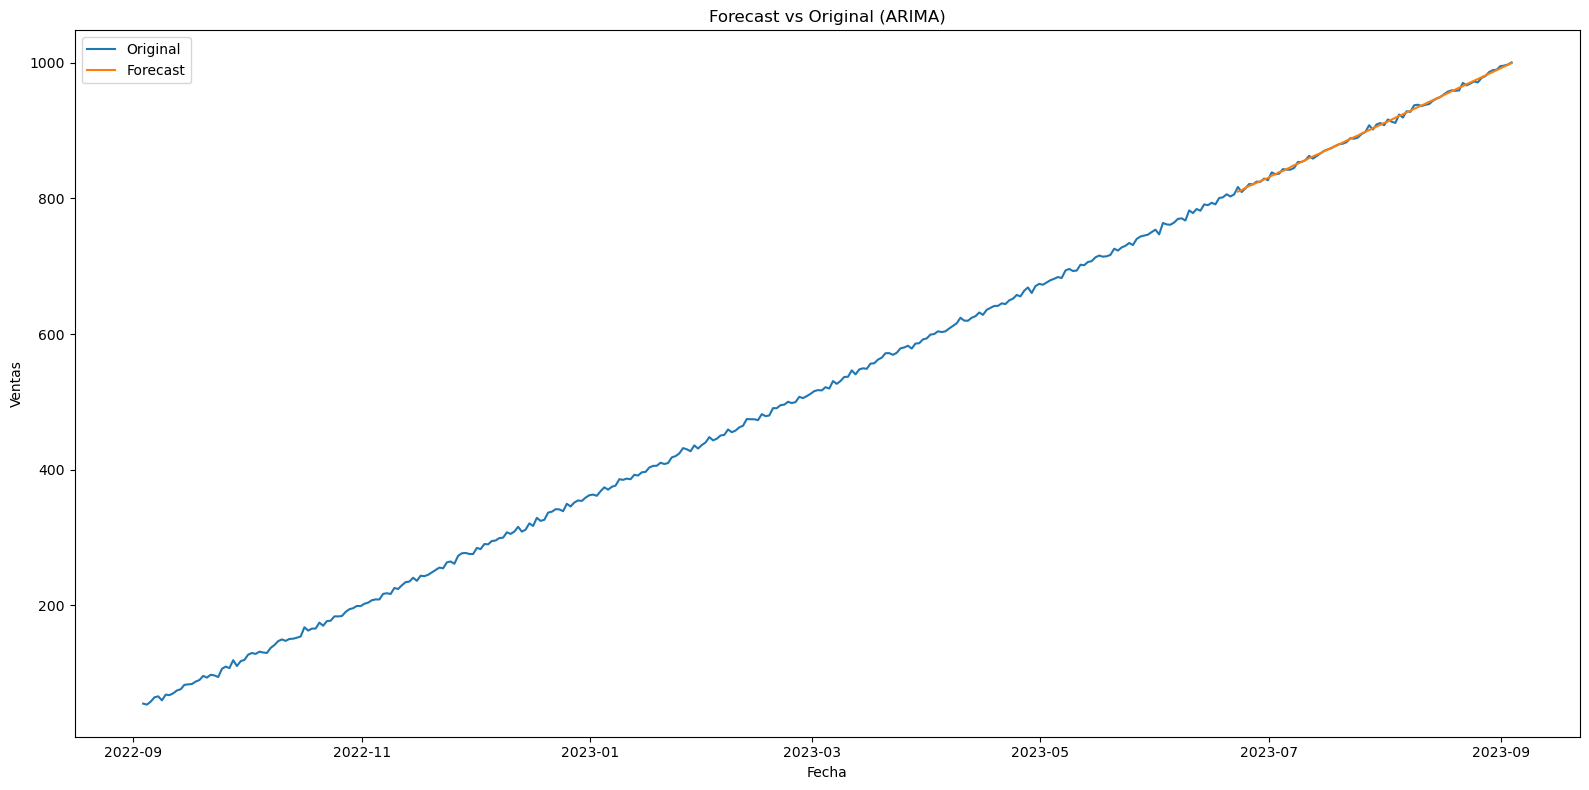

In [24]:
fig, axis = plt.subplots(figsize=(16, 8))  # Aumenta tamaño aquí

sns.lineplot(x=ts_stationary.index, y=ts_stationary.values, label="Original", ax=axis)
sns.lineplot(x=forecast_series.index, y=forecast_series.values, label="Forecast", ax=axis)

plt.title("Forecast vs Original (ARIMA)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.tight_layout()
plt.show()

 La media es el valor que minimiza los errores. Transformado a valores originales seria la linea de tendencia la prevision mas acertada.

In [25]:
import joblib

# Guardar el modelo
joblib.dump(model, 'modelo_arima.pkl')

['modelo_arima.pkl']